In [1]:
import mysql.connector as sql

In [4]:
db = sql.connect(host='localhost', user='root',password='a10s11q15', database='hr')

In [5]:
mycursor = db.cursor()

# TASK 1

In [8]:
t1 = "select c.region_id,c.country_name,r.region_name from countries as c join regions as r on c.region_id=r.region_id \
order by r.region_name"

In [11]:
mycursor.execute(t1)
data1 = mycursor.fetchall()

for i in data1:
    print(i)

(2, 'Argentina', 'Americas')
(2, 'Brazil', 'Americas')
(2, 'Canada', 'Americas')
(2, 'Mexico', 'Americas')
(2, 'United States of America', 'Americas')
(3, 'Australia', 'Asia')
(3, 'China', 'Asia')
(3, 'HongKong', 'Asia')
(3, 'India', 'Asia')
(3, 'Japan', 'Asia')
(3, 'Singapore', 'Asia')
(1, 'Belgium', 'Europe')
(1, 'Switzerland', 'Europe')
(1, 'Germany', 'Europe')
(1, 'Denmark', 'Europe')
(1, 'France', 'Europe')
(1, 'Italy', 'Europe')
(1, 'Netherlands', 'Europe')
(1, 'United Kingdom', 'Europe')
(4, 'Egypt', 'Middle East and Africa')
(4, 'Israel', 'Middle East and Africa')
(4, 'Kuwait', 'Middle East and Africa')
(4, 'Nigeria', 'Middle East and Africa')
(4, 'Zambia', 'Middle East and Africa')
(4, 'Zimbabwe', 'Middle East and Africa')


# TASK 2

In [12]:
import pandas as pd

In [13]:
t2 = pd.read_sql_query(" select * from countries",db)
t2.head(2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country_id,country_name,region_id
0,AR,Argentina,2
1,AU,Australia,3


In [14]:
t2a = pd.read_sql_query('select * from employees',db)
t2a.head(2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id,annual_ctc,incremented_salary,final_ctc,for_rev_1,for_rev_2,for_rev_3
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,24000.0,NaN,NaN,90.0,288000,25200,None,None,None,None
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,17000.0,NaN,100.0,90.0,204000,17850,None,None,None,None


In [15]:
t2b = pd.read_sql_query('select * from departments',db)
t2b.head(2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,department_id,department_name,manager_id,location_id
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800


In [16]:
t2c = pd.read_sql_query('select * from regions',db)
t2c.head(2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,region_id,region_name
0,1,Europe
1,2,Americas


In [24]:
t6 = pd.read_sql_query('select * from locations',db)
t6.head(2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,location_id,street_address,postal_code,city,state_province,country_id
0,1000,1297 Via Cola di Rie,00989,Roma,None,IT
1,1100,93091 Calle della Testa,10934,Venice,None,IT


In [25]:
t6a = pd.merge(t2,t2c ,on='region_id')
t6a.head(2)

,country_id,country_name,region_id,region_name
0,AR,Argentina,2,Americas
1,BR,Brazil,2,Americas


In [41]:
f2 = pd.merge(t2a,t2b ,on='department_id')
f2.head(2)

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id_x,department_id,annual_ctc,incremented_salary,final_ctc,for_rev_1,for_rev_2,for_rev_3,department_name,manager_id_y,location_id
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,24000.0,NaN,NaN,90.0,288000,25200,None,None,None,None,Executive,100.0,1700
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,17000.0,NaN,100.0,90.0,204000,17850,None,None,None,None,Executive,100.0,1700


In [42]:
f3 = pd.merge(t6a,t6,on='country_id')
f3.head(2)

,country_id,country_name,region_id,region_name,location_id,street_address,postal_code,city,state_province
0,BR,Brazil,2,Americas,2800,Rua Frei Caneca 1360,01307-002,Sao Paulo,Sao Paulo
1,CA,Canada,2,Americas,1800,147 Spadina Ave,M5V 2L7,Toronto,Ontario


In [43]:
final_table=pd.merge(f2,f3,on='location_id')
final_table.head(15)

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id_x,...,manager_id_y,location_id,country_id,country_name,region_id,region_name,street_address,postal_code,city,state_province
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,24000.0,NaN,NaN,...,100.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,17000.0,NaN,100.0,...,100.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
2,102,Lex,De Haan,LDEHAAN,515.123.4569,1993-01-13,AD_VP,17000.0,NaN,100.0,...,100.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
3,108,Nancy,Greenberg,NGREENBE,515.124.4569,1994-08-17,FI_MGR,12000.0,NaN,101.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
4,109,Daniel,Faviet,DFAVIET,515.124.4169,1994-08-16,FI_ACCOUNT,9000.0,NaN,108.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
5,110,John,Chen,JCHEN,515.124.4269,1997-09-28,FI_ACCOUNT,8200.0,NaN,108.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
6,111,Ismael,Sciarra,ISCIARRA,515.124.4369,1997-09-30,FI_ACCOUNT,7700.0,NaN,108.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
7,112,Jose Manuel,Urman,JMURMAN,515.124.4469,1998-03-07,FI_ACCOUNT,7800.0,NaN,108.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
8,113,Luis,Popp,LPOPP,515.124.4567,1999-12-07,FI_ACCOUNT,6900.0,NaN,108.0,...,108.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington
9,114,Den,Raphaely,DRAPHEAL,515.127.4561,1994-12-07,PU_MAN,11000.0,NaN,100.0,...,114.0,1700,US,United States of America,2,Americas,2004 Charade Rd,98199,Seattle,Washington


# TASK 3

In [44]:
t3 = final_table.groupby(by=['country_name','city'])['employee_id'].count()
print(t3)

country_name              city               
Canada                    Toronto                 2
Germany                   Munich                  1
United Kingdom            London                  1
                          Oxford                 34
United States of America  Seattle                18
                          South San Francisco    45
                          Southlake               5
Name: employee_id, dtype: int64


In [45]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='country_name,city'>

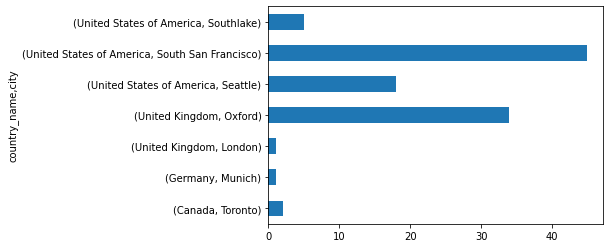

In [46]:
t3.plot(kind='barh')